 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [ ]:
#Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns

%matplotlib inline

In [ ]:
#Use the path library to import path
from pathlib import Path

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [ ]:
#Reading whale returns
#Set csvpath to location of whale_returns csv file
whale_returns_csv = Path("Resources/whale_returns.csv")

#Read in the CSV and create Dataframe, 
#Set index to date column and ensure dates are converted to a DateTimeIndex.
#Parse dates using default pandas date parser
whale_returns = pd.read_csv(whale_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)

#Confirm dates are sorted in place in ascending manner
whale_returns.sort_index(ascending=True, inplace=True)

#Return the fist three rows of the whale_returns data frame for inspection
whale_returns.head(3)

In [ ]:
#Count nulls
whale_returns.isnull().sum()

In [ ]:
#Drop nulls in place
whale_returns.dropna(inplace=True)

#Check again for nulls and print sum to ensure data has been cleansed of any null values
whale_returns.isnull().sum()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [ ]:
#Reading whale returns
#Set csvpath to location of algo_returns csv file
algo_returns_csv = Path("Resources/algo_returns.csv")

#Read in the CSV and create Dataframe, 
#Set index to date column and ensure dates are converted to a DateTimeIndex.
#Parse dates using default pandas date parser
algo_returns = pd.read_csv(algo_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)

#Confirm dates are sorted in place in ascending manner
algo_returns.sort_index(ascending=True, inplace=True)

#Return the fist three rows of the algo_returns data frame for inspection
algo_returns.head(3)

In [ ]:
#Count nulls
algo_returns.isnull().sum()

In [ ]:
#Drop nulls in place
algo_returns.dropna(inplace=True)

#Check again for nulls and print sum to ensure data has been cleansed of any null values
algo_returns.isnull().sum()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [ ]:
#Reading S&P TSX 60 Closing Prices
#Set csvpath to location of sp tsx csv file
sp_tsx_returns_csv = Path("Resources/sp_tsx_history.csv")

#Read in the CSV and create Dataframe, 
#Set index to date column and ensure dates are converted to a DateTimeIndex.
#Parse dates using default pandas date parser
sp_tsx_returns = pd.read_csv(sp_tsx_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)

#Confirm dates are sorted in place in ascending manner
sp_tsx_returns.sort_index(ascending=True, inplace=True)

#Return the fist three rows of the sp_tsx_returns data frame for inspection
sp_tsx_returns.head(3)

In [ ]:
#Check Data Types
sp_tsx_returns.dtypes

In [ ]:
#Fix Data Types
#`Close` currently set to type object, Cast `Close` object as float
#Before we can cast this as type float we will need to clean up the data and remove $ and , chars then cast as float
sp_tsx_returns['Close'] = sp_tsx_returns['Close'].str.replace(',', '').str.replace('$', '').astype(float)

#Check Data Types to confirm Close is now dtype float
sp_tsx_returns.dtypes

In [ ]:
#Calculate Daily Returns
sp_tsx_daily_returns = sp_tsx_returns.pct_change()

#Check pct_change Data
sp_tsx_daily_returns.head(3)

In [ ]:
#Check for Nulls
sp_tsx_daily_returns.isnull().sum()

In [ ]:
#Drop nulls in place
sp_tsx_daily_returns.dropna(inplace=True)

#Check again for nulls and print sum to ensure data has been cleansed of any null values
sp_tsx_daily_returns.isnull().sum()

In [ ]:
#Rename `Close` column to refelect the new data it contains which is the "S&P TSX 60 Daily Returns"
sp_tsx_daily_returns = sp_tsx_daily_returns.rename(columns = {"Close":"S&P TSX 60"})

#Check Data Frame to confirm column rename
sp_tsx_daily_returns.head(3)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [ ]:
#Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns, sp_tsx_daily_returns], axis="columns", join="inner")

#Return the fist three rows of the new combined data frame for inspection
combined_df.tail(3)

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [ ]:
#Plot daily returns of all portfolios with title "Daily Returns"
combined_df.plot(figsize=(20,10), title = "Daily Returns")

#### Calculate and Plot cumulative returns.

In [ ]:
#Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

#Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title = "Cumulative Returns")

#### Calculate and Plot cumulative returns.


##### From analysing the cumulative returns plot you can see that no other portfolio outperforms the S&P TSX 60

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [ ]:
#Box plot to visually show risk
combined_df.boxplot(figsize = (20,10))

### Calculate Standard Deviations

In [ ]:
#Calculate the daily standard deviations of all portfolios
combined_df_std = combined_df.std()

#Return all rows of the combined standard deviations data frame for inspection
combined_df_std

### Determine which portfolios are riskier than the S&P TSX 60

In [ ]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_returns_std = combined_df_std["S&P TSX 60"]

#Determine which portfolios are riskier than the S&P TSX 60
#If the standard deviation for each portfolio is greater then the standard deviation of the S&P TSX 60, then 'riskier' will be True
#Create this dataset and create a new dataframe called sp_tsx_returns_std_risk
sp_tsx_returns_std_risk  = combined_df_std > sp_tsx_returns_std

#Return the sp_tsx_returns_std_risk data frame for inspection and note any portfolios with value "True". These are riskier then the S&P TSX 60
sp_tsx_returns_std_risk

#### Determine which portfolios are riskier than the S&P TSX 60


##### From analysing the output below you can see the following portfolios are riskier than the S&P TSX 60
###### SOROS FUND MANAGEMENT LLC    
###### TIGER GLOBAL MANAGEMENT LLC     
###### BERKSHIRE HATHAWAY INC          
###### Algo 1                          
###### Algo 2                         


### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_df_std * np.sqrt(252)

#Return annual standard deviation dataframe for inspection
annual_std

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
group_rolling = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
group_rolling.plot(figsize = (20,10), title = "21 day rolling standard deviation for all portfolios")

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation
correlation = combined_df.corr()
correlation

# Display de correlation matrix
sns.heatmap(correlation, vmin = -1, vmax = 1) 

### Calculate and Plot Beta for Algo 1 portfolio and the S&P 60 TSX

In [ ]:
# Calculate covariance of the Algo 1 Portfolio
rolling_covariance_algo1 = combined_df['Algo 1'].rolling(window = 60).cov(combined_df['S&P TSX 60'])

# Calculate variance of S&P TSX
rolling_variance = combined_df['S&P TSX 60'].rolling(window = 60).var()

# Computing beta
rolling_beta_algo1 = rolling_covariance_algo1 / rolling_variance

# Plot beta trend
rolling_beta_algo1.plot(figsize = (20,10), title="Rolling Beta for Algo 1 Portfolio and the S&P TSX 60")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window
ewm = combined_df.ewm(halflife = 21).mean().plot(figsize=(20,10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Sharpe ratio is a measure of excess portfolio return over the risk-free rate relative to its standard deviation. As such a higher Sharpe ratio can be considered superior to others.

Both algorithmic strategies outperform the market (S&P TSX 60) 

The algorithmic 1 portfolio outperforms all other whale portfolio strategies. 

The algorithmic 2 portfolio outperforms all other whale portfolio strategies with only one exception. The only portfolio to outperform The algorithmic 2 portfolio is the BERKSHIRE HATHAWAY INC porfolio.  

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

### Stock 1 Walmart - Import and clean the data

In [ ]:
#Reading data from 1st stock - Walmart
#Reading Walmart Closing Prices
#Set csvpath to location of sp tsx csv file
walmart_returns_csv = Path("Resources/walmart_historical.csv")

#Read in the CSV and create Dataframe, 
#Set index to date column and ensure dates are converted to a DateTimeIndex.
#Parse dates using default pandas date parser
walmart_returns = pd.read_csv(walmart_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)

#Confirm dates are sorted in place in ascending manner
walmart_returns.sort_index(ascending=True, inplace=True)

#Return the fist three rows of the walmart_returns data frame for inspection
walmart_returns.head(3)

In [ ]:
#Remove unwanted columns
walmart_returns.drop(columns=["Unnamed: 2", "Unnamed: 3"], axis=1, inplace=True)

#Check dataframe and ensure it has been cleaned of unwanted columns
walmart_returns

In [ ]:
#Check for Nulls
walmart_returns.isnull().sum()

In [ ]:
#Drop nulls in place
walmart_returns.dropna(inplace=True)

#Check again for nulls and print sum to ensure data has been cleansed of any null values
walmart_returns.isnull().sum()

In [ ]:
#Return a sample of the cleaned data frame and inspect to ensure only the columns and required data remains
walmart_returns.sample(3)

### Stock 2 Amazon - Import and clean the data

In [ ]:
#Reading data from 2nd stock - Amazon
#Reading Amazon Closing Prices
#Set csvpath to location of sp tsx csv file
amazon_returns_csv = Path("Resources/amazon_historical.csv")

#Read in the CSV and create Dataframe, 
#Set index to date column and ensure dates are converted to a DateTimeIndex.
#Parse dates using default pandas date parser
amazon_returns = pd.read_csv(amazon_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)

#Confirm dates are sorted in place in ascending manner
amazon_returns.sort_index(ascending=True, inplace=True)

#Return the fist three rows of the amazon_returns data frame for inspection
amazon_returns.head(3)

In [ ]:
#Remove unwanted columns
amazon_returns.drop(columns=["Unnamed: 2", "Unnamed: 3"], axis=1, inplace=True)

#Check dataframe and ensure it has been cleaned of unwanted columns
amazon_returns

In [ ]:
#Check for Nulls
amazon_returns.isnull().sum()

In [ ]:
#Drop nulls in place
amazon_returns.dropna(inplace=True)

#Check again for nulls and print sum to ensure data has been cleansed of any null values
amazon_returns.isnull().sum()

In [ ]:
#Return a sample of the cleaned data frame and inspect to ensure only the columns and required data remains
amazon_returns.sample(3)

### Stock 3 Apple - Import and clean the data

In [ ]:
#Reading data from 3rd stock - Apple
#Reading Apple Closing Prices
#Set csvpath to location of sp tsx csv file
apple_returns_csv = Path("Resources/apple_historical.csv")

#Read in the CSV and create Dataframe, 
#Set index to date column and ensure dates are converted to a DateTimeIndex.
#Parse dates using default pandas date parser
apple_returns = pd.read_csv(apple_returns_csv, index_col='Date', infer_datetime_format=True, parse_dates = True)

#Confirm dates are sorted in place in ascending manner
apple_returns.sort_index(ascending=True, inplace=True)

#Return the fist three rows of the apple_returns data frame for inspection
apple_returns.head(3)


In [ ]:
#Remove unwanted columns
apple_returns.drop(columns=["Unnamed: 2", "Unnamed: 3"], axis=1, inplace=True)

#Check dataframe and ensure it has been cleaned of unwanted columns
apple_returns

In [ ]:
#Check for Nulls
apple_returns.isnull().sum()

In [ ]:
#Drop nulls in place
apple_returns.dropna(inplace=True)

#Check again for nulls and print sum to ensure data has been cleansed of any null values
apple_returns.isnull().sum()

In [ ]:
#Return a sample of the cleaned data frame and inspect to ensure only the columns and required data remains
apple_returns.sample(3)

### Combine all stocks and calculate daily returns

In [ ]:
#Combine all stocks in a single DataFrame
#Join walmart_returns, amazon_returns and apple_returns into a single DataFrame with columns for each portfolio's returns.
my_portfolio_df = pd.concat([walmart_returns, amazon_returns, apple_returns], axis="columns", join="inner")

#Return a sample of the new combined data frame for inspection
my_portfolio_df.sample(3)

In [ ]:
#Reset Date index
#Not Required as Index columns and format was set during read_csv operation 

In [ ]:
#Reorganize portfolio data by having a column per symbol
my_portfolio_df.columns = ['WMT', 'AMZN', 'AAPL']

#Return a sample of the new combined data frame for inspection to confirm updated column names
my_portfolio_df.sample(3)

In [ ]:
# Calculate daily returns
my_portfolio_df_returns = my_portfolio_df.pct_change()

# Drop NAs from first row as this will always be NA due to no preceeding data for pct_change calculation
my_portfolio_df_returns.dropna(inplace=True)

#Check again for nulls and print sum to ensure data has been cleansed of any null values
my_portfolio_df_returns.isnull().sum()

In [ ]:
#Return a sample of the new combined data frame for inspection
my_portfolio_df_returns.head(5)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [462]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_df_returns_combined = my_portfolio_df_returns.dot(weights)

# Display sample data
my_portfolio_df_returns_combined.head(5)

Date
2015-03-04   -0.006858
2015-03-05    0.002846
2015-03-06   -0.010034
2015-03-09    0.001303
2015-03-10   -0.018147
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [463]:
#Join your portfolios returns DataFrame to the original returns DataFrame
complete_combined_df = pd.concat([combined_df, my_portfolio_df_returns_combined], axis = 'columns', join = 'inner')

#Display sample data of complete combined dataframe
complete_combined_df.head(3)

In [469]:
#Rename my portfolio column to refelect the data it contains which is the "My Portfolio Returns"
complete_combined_df = complete_combined_df.rename(columns = {0:"My Portfolio"})

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
complete_combined_df.dropna(inplace=True)

#Check again for nulls and print sum to ensure data has been cleansed of any null values
complete_combined_df.isnull().sum()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [471]:
#Calculate the annualized standard deviation (252 trading days)
#Calculate the daily standard deviations of all portfolios
complete_combined_df_std = complete_combined_df.std()
combined_annual_std = complete_combined_df_std * np.sqrt(252)

#Return annual standard deviation dataframe for inspection
combined_annual_std

SOROS FUND MANAGEMENT LLC      0.124343
PAULSON & CO.INC.              0.110923
TIGER GLOBAL MANAGEMENT LLC    0.172883
BERKSHIRE HATHAWAY INC         0.203727
Algo 1                         0.120580
Algo 2                         0.132251
S&P TSX 60                     0.111666
My Portfolio                   0.184460
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 day rolling standard deviation including My Portfolio'}, xlabel='Date'>

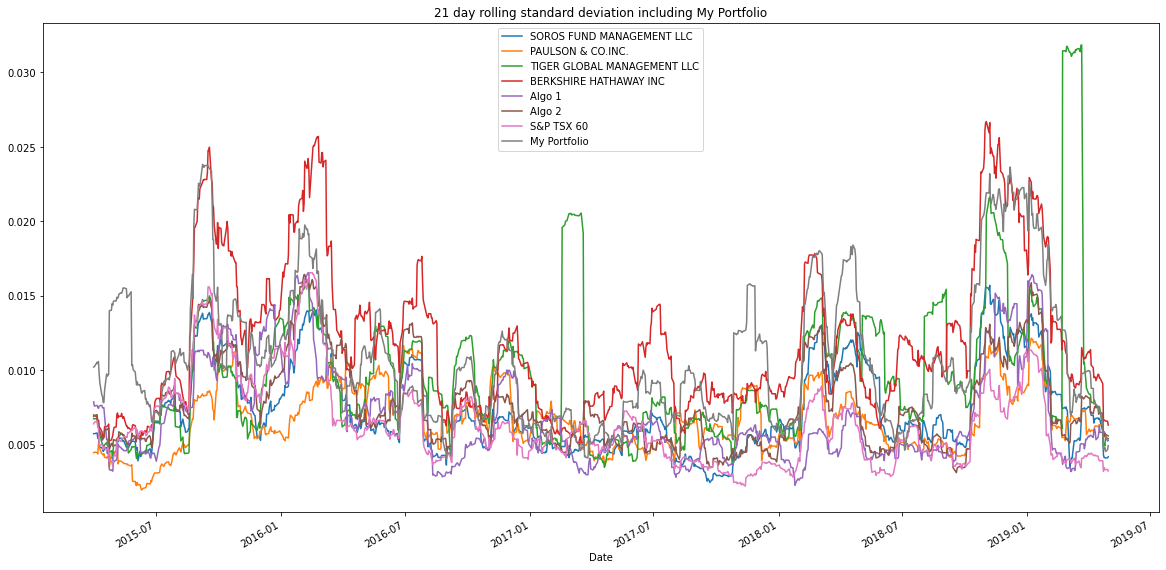

In [472]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_group_rolling = complete_combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
combined_group_rolling.plot(figsize = (20,10), title = "21 day rolling standard deviation including My Portfolio")

### Calculate and plot the correlation

<AxesSubplot:>

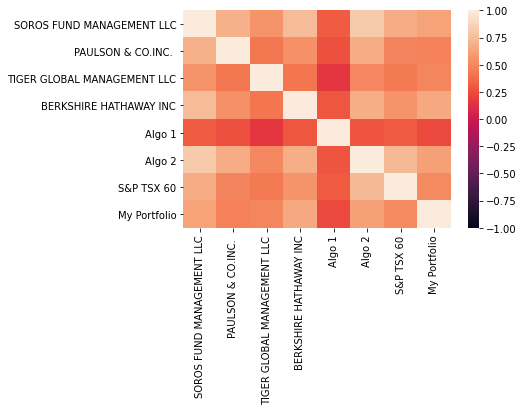

In [473]:
# Calculate and plot the correlation
# Calculate the correlation
combined_correlation = complete_combined_df.corr()
combined_correlation

# Display de correlation matrix
sns.heatmap(combined_correlation, vmin = -1, vmax = 1) 

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling Beta for My Portfolio and the S&P TSX 60'}, xlabel='Date'>

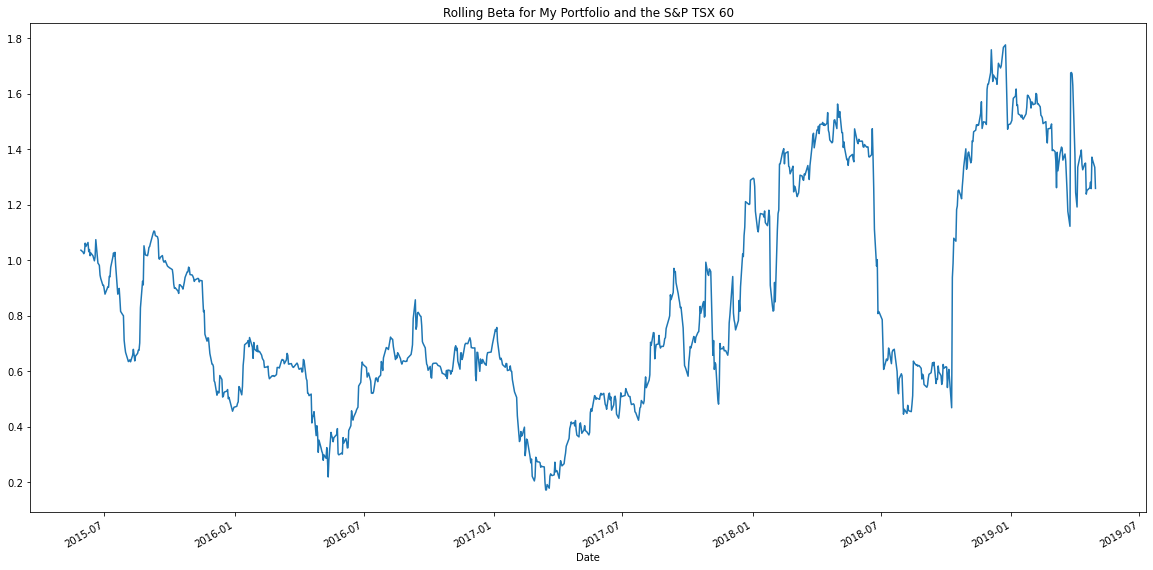

In [474]:
# Calculate covariance of the Algo 1 Portfolio
rolling_covariance_my_portfolio = complete_combined_df['My Portfolio'].rolling(window = 60).cov(combined_df['S&P TSX 60'])

# Calculate variance of S&P TSX
rolling_variance = complete_combined_df['S&P TSX 60'].rolling(window = 60).var()

# Computing beta
rolling_beta_my_portfolio = rolling_covariance_my_portfolio / rolling_variance

# Plot beta trend
rolling_beta_my_portfolio.plot(figsize = (20,10), title="Rolling Beta for My Portfolio and the S&P TSX 60")


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [476]:
# Calculate Annualized Sharpe Ratios
combined_sharpe_ratios = (complete_combined_df.mean() * 252) / (complete_combined_df.std() * np.sqrt(252))
combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.301110
PAULSON & CO.INC.             -0.534272
TIGER GLOBAL MANAGEMENT LLC   -0.132665
BERKSHIRE HATHAWAY INC         0.485005
Algo 1                         1.496819
Algo 2                         0.412780
S&P TSX 60                     0.225006
My Portfolio                   0.985426
dtype: float64

<AxesSubplot:>

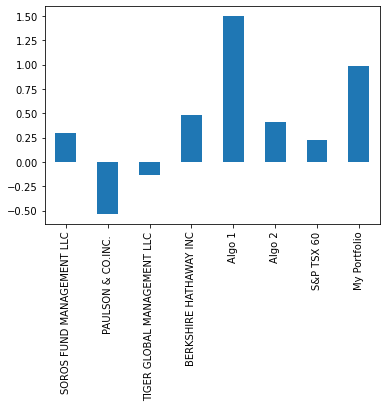

In [477]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind = 'bar')

### How does your portfolio do?

Sharpe ratio is a measure of excess portfolio return over the risk-free rate relative to its standard deviation. As such a higher Sharpe ratio can be considered superior to others.

Analysing the Sharpe ratio for my portfolio, it can be seen that it outperforms the S&P TSX 60 and all other portfolios with the exception of the Algo 1 portfolio.

For this reason I would conclude that "My Portfolio" custom portfolio made up of equally weighted Walmart, Amazon and Apple stocks does well.
  